## ROC-AUC

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import (
    roc_auc_score,
    plot_roc_curve,
)

from yellowbrick.classifier import ROCAUC

## Load data

In [3]:
# load data
data = pd.read_csv('../kdd2004.csv')

# remap target class to 0 and 1
data['target'] = data['target'].map({-1:0, 1:1})

data.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,target
0,52.0,32.69,0.30,2.5,20.0,1256.8,-0.89,0.33,11.0,-55.0,...,1595.1,-1.64,2.83,-2.0,-50.0,445.2,-0.35,0.26,0.76,0
1,58.0,33.33,0.00,16.5,9.5,608.1,0.50,0.07,20.5,-52.5,...,762.9,0.29,0.82,-3.0,-35.0,140.3,1.16,0.39,0.73,0
2,77.0,27.27,-0.91,6.0,58.5,1623.6,-1.40,0.02,-6.5,-48.0,...,1491.8,0.32,-1.29,0.0,-34.0,658.2,-0.76,0.26,0.24,0
3,41.0,27.91,-0.35,3.0,46.0,1921.6,-1.36,-0.47,-32.0,-51.5,...,2047.7,-0.98,1.53,0.0,-49.0,554.2,-0.83,0.39,0.73,0
4,50.0,28.00,-1.32,-9.0,12.0,464.8,0.88,0.19,8.0,-51.5,...,479.5,0.68,-0.59,2.0,-36.0,-6.9,2.02,0.14,-0.23,0


In [4]:
# data size

data.shape

(145751, 75)

In [5]:
# imbalanced target

data.target.value_counts() / len(data)

0    0.991108
1    0.008892
Name: target, dtype: float64

In [6]:
# separate dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),  # drop the target
    data['target'],  # just the target
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((102025, 74), (43726, 74))

## Baseline: predict the majority class

In [7]:
# Baseline prediction: predict the majority class

y_train_base = pd.Series(np.zeros(len(y_train)))
y_test_base = pd.Series(np.zeros(len(y_test)))

## Train ML models

### Random Forests

In [12]:
rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=2, n_jobs=4)

rf.fit(X_train, y_train)

y_train_rf = rf.predict_proba(X_train)[:,1]
y_test_rf = rf.predict_proba(X_test)[:,1]

### Logistic Regression

In [13]:
logit = LogisticRegression(random_state=0,  max_iter=1000)

logit.fit(X_train, y_train)

y_train_logit = logit.predict_proba(X_train)[:,1]
y_test_logit = logit.predict_proba(X_test)[:,1]

/home/bk/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## ROC-AUC

In [14]:
print('ROC-AUC Baseline test: ', roc_auc_score(y_test, y_test_base))
print('ROC-AUC Random Forest test:', roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))
print('ROC-AUC Logistic Regression test:', roc_auc_score(y_test, logit.predict_proba(X_test)[:,1]))

ROC-AUC Baseline test:  0.5
ROC-AUC Random Forest test: 0.9510331857984653
ROC-AUC Logistic Regression test: 0.9902265630588307


## Plot ROC-AUC

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html

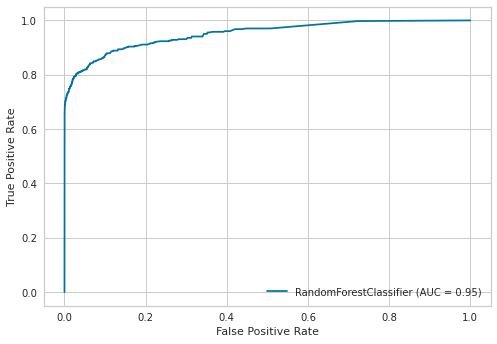

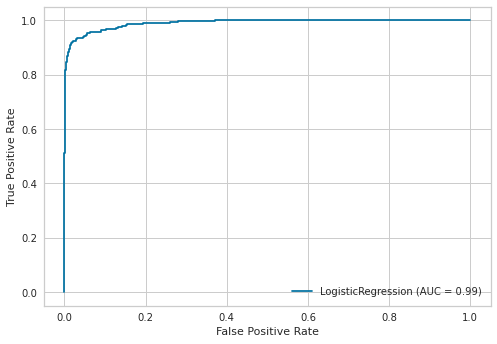

In [15]:
rf_disp = plot_roc_curve(rf, X_test, y_test)
logit_disp = plot_roc_curve(logit, X_test, y_test)

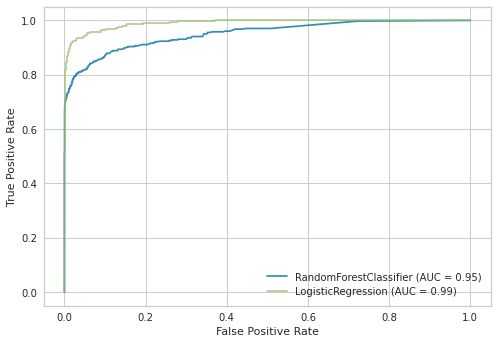

In [16]:
ax = plt.gca()
rf_disp.plot(ax=ax, alpha=0.8)
logit_disp.plot(ax=ax, alpha=0.8)

## ROC-AUC with yellowbrick

https://www.scikit-yb.org/en/latest/api/classifier/rocauc.html

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


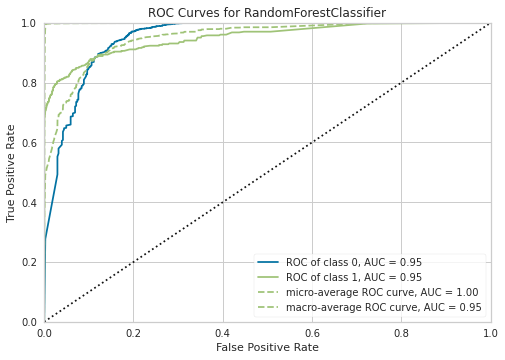

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [17]:
visualizer = ROCAUC(rf, classes=[0, 1])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

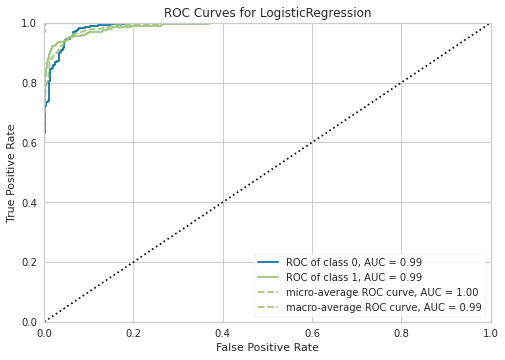

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [19]:
visualizer = ROCAUC(logit, classes=[0, 1])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure